# Scikit-oTree Tutorial


Welcome to the Scikit-oTree tutorial. This package aims to integrate
any experiment developed on-top of [oTree](otree.org), with the 
[Python Scientific-Stack](https://www.scipy.org/about.html); alowing
the scientists to access a big collection of tools for analyse the
experimental data.

## Philosophy

### 1. The data must be processed only by the oTree deployment.

Scikit-oTree don't preprocess any data from the experiment. All the information
are preserved exactly as any traditional export from oTree; the project only
take this data and present it.

### 2. The environment for analysis must not be modified.

oTree uses some global configuration to make it run. Scikit-oTree don't store
any global configuration alowwing to load data from different experiments
without problems. All the oTree related processing always happen in an
external process.

### 3. Only one data type for the data.

The data are always presented as a 
[Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/overview.html)


## Installation

To install Scikit-oTree you must has Python and PIP. You can found
a comprensive tutorial to install it [here](http://otree.readthedocs.io/en/latest/install.html#step-1-install-python).

After that you only need to run

```bash
pip install -U scikit-otree
```

## Loading the experiment

To load your experiment you need to provide 
the location of the oTree deployment. This is the 
same location where the `setting.py` lives.

In [1]:
# this load the library
import skotree

# this load the experiment located
# in the directory tests and
experiment = skotree.oTree("./tests")
experiment

<oTree@/home/juan/proyectos/skotree/src/tests>

The previous code make a lot of things in background:

1. First create an extra process deatached from the local one
   to extract all oTree related settings.
2. Wait until the process to end.
3. Check the result of the process and store the settings as
   atrribute for `experiment` object.
   
Let's check the result

In [2]:
experiment.settings

This is the traditional object that you
obtain in any oTree experiment if you
write 

```python
from django.conf import settings
```
Now let's check some information about the experiment, for example
all the exiting oTree apps.

In [3]:
experiment.lsapps()

['matching_pennies']

or maybe you want to see all the sessiong configured
that uses all this apps

In [4]:
experiment.lssessions()

['matching_pennies']

Yikes! the app and the session has the same name. Let's check the full session configuration.

In [5]:
experiment.session_config("matching_pennies")

{'app_sequence': ['matching_pennies'],
 'display_name': 'Matching Pennies',
 'doc': '',
 'mturk_hit_settings': {'description': 'Description for your experiment',
  'expiration_hours': 168,
  'frame_height': 500,
  'keywords': ['bonus', 'study'],
  'minutes_allotted_per_assignment': 60,
  'preview_template': 'global/MTurkPreview.html',
  'qualification_requirements': [],
  'title': 'Title for your experiment'},
 'name': 'matching_pennies',
 'num_demo_participants': 2,
 'participation_fee': 0.0,
 'real_world_currency_per_point': 0.0}


Finally you can access <span class="text-info">any</span> content of the *settings* object ussing the attribute showed before. For example, maybe you want to see the "**currency code**"

In [6]:
experiment.settings.REAL_WORLD_CURRENCY_CODE

'USD'

## The Data

Lets check the oTree server data tab

![oTree Server Data Export](res/export.png)

As you can see 4 kind of data can be exported from any experiment. 

### 1. All app

This generates one DataFrame with one row per participant, and all rounds are stacjed horizontally. For Scikit-oTree this functionallity are exposed as `all_data()` method

In [7]:
all_data = experiment.all_data()
all_data

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,matching_pennies.3.player.is_winner,matching_pennies.3.player.payoff,matching_pennies.3.group.id_in_subsession,matching_pennies.3.subsession.round_number,matching_pennies.4.player.id_in_group,matching_pennies.4.player.penny_side,matching_pennies.4.player.is_winner,matching_pennies.4.player.payoff,matching_pennies.4.group.id_in_subsession,matching_pennies.4.subsession.round_number
0,1,6w86ghe3,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,0,1,3,2,Tails,0,0,1,4
1,2,wb5j04nb,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,1,0,1,3,1,Heads,1,0,1,4


### 2. Per-App Data

These data-frame contain a row for each player in the given app. If there are multiple rounds, there will be multiple rows for the same participant. To access this information you need to provide the application name to the  method `app_data()`

In [8]:
data = experiment.app_data("matching_pennies")
data

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,player.payoff,group.id_in_subsession,subsession.round_number,session.code,session.label,session.experimenter_name,session.mturk_HITId,session.mturk_HITGroupId,session.comment,session.is_demo
0,1,6w86ghe3,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,100,1,1,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
1,2,wb5j04nb,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,1,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
2,1,6w86ghe3,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
3,2,wb5j04nb,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
4,1,6w86ghe3,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
5,2,wb5j04nb,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
6,1,6w86ghe3,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,4,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1
7,2,wb5j04nb,NaN,0,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,4,4l9qp3nm,NaN,NaN,NaN,NaN,NaN,1


With the power of *pandas.DataFrame* you can easily filter the data

In [9]:
filtered = data[["participant.code", "player.penny_side", "player.payoff"]]
filtered

,participant.code,player.penny_side,player.payoff
0,6w86ghe3,Heads,100
1,wb5j04nb,Tails,0
2,6w86ghe3,Heads,0
3,wb5j04nb,Heads,0
4,6w86ghe3,Tails,0
5,wb5j04nb,Heads,0
6,6w86ghe3,Tails,0
7,wb5j04nb,Heads,0


Describe the data

In [10]:
filtered.describe()

,player.payoff
count,8.000000
mean,12.500000
std,35.355339
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


group by participant

In [11]:
group = filtered.groupby("participant.code")
group.describe()

player.payoff                                        
                         count  mean   std  min  25%  50%   75%    max
participant.code                                                      
6w86ghe3                   4.0  25.0  50.0  0.0  0.0  0.0  25.0  100.0
wb5j04nb                   4.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0

or check all the columns availables

In [12]:
data.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._round_number', 'participant._current_page_name',
       'participant.ip_address', 'participant.time_started',
       'participant.visited', 'participant.mturk_worker_id',
       'participant.mturk_assignment_id', 'participant.payoff',
       'player.id_in_group', 'player.penny_side', 'player.is_winner',
       'player.payoff', 'group.id_in_subsession', 'subsession.round_number',
       'session.code', 'session.label', 'session.experimenter_name',
       'session.mturk_HITId', 'session.mturk_HITGroupId', 'session.comment',
       'session.is_demo'],
      dtype='object')

### 3. Per-App Documentation

The code 

```python
    experiment.app_doc("matching_pennies")
``` 

returns the full documentation about the data retrieved by `app_data()`

### 4. Time spent on each page

Time spent on each page

In [13]:
tspent = experiment.time_spent()
tspent

,session_id,participant__id_in_session,participant__code,page_index,app_name,page_name,time_stamp,seconds_on_page,subsession_pk,auto_submitted
0,1,1,6w86ghe3,1,matching_pennies,Choice,1508555265,8,1,False
1,1,1,6w86ghe3,2,matching_pennies,ResultsWaitPage,1508555272,7,1,False
2,1,1,6w86ghe3,4,matching_pennies,Choice,1508555281,9,2,False
3,1,1,6w86ghe3,5,matching_pennies,ResultsWaitPage,1508555282,1,2,False
4,1,1,6w86ghe3,7,matching_pennies,Choice,1508555288,6,3,False
5,1,1,6w86ghe3,8,matching_pennies,ResultsWaitPage,1508555293,5,3,False
6,1,1,6w86ghe3,10,matching_pennies,Choice,1508555299,6,4,False
7,1,1,6w86ghe3,11,matching_pennies,ResultsWaitPage,1508555300,1,4,False
8,1,2,wb5j04nb,1,matching_pennies,Choice,1508555270,12,1,False
9,1,2,wb5j04nb,2,matching_pennies,ResultsWaitPage,1508555271,1,1,False


In [14]:
# check the available columns
tspent.columns 

Index(['session_id', 'participant__id_in_session', 'participant__code',
       'page_index', 'app_name', 'page_name', 'time_stamp', 'seconds_on_page',
       'subsession_pk', 'auto_submitted'],
      dtype='object')

In [15]:
# filter only the most important columns
tspent = tspent[["participant__code", "page_index", "seconds_on_page"]]
tspent

,participant__code,page_index,seconds_on_page
0,6w86ghe3,1,8
1,6w86ghe3,2,7
2,6w86ghe3,4,9
3,6w86ghe3,5,1
4,6w86ghe3,7,6
5,6w86ghe3,8,5
6,6w86ghe3,10,6
7,6w86ghe3,11,1
8,wb5j04nb,1,12
9,wb5j04nb,2,1


In [16]:
# lets describe the time expent by page
tspent.groupby("page_index").describe()

seconds_on_page                                              
                     count  mean       std  min   25%   50%    75%   max
page_index                                                              
1                      2.0  10.0  2.828427  8.0  9.00  10.0  11.00  12.0
2                      2.0   4.0  4.242641  1.0  2.50   4.0   5.50   7.0
4                      2.0   8.5  0.707107  8.0  8.25   8.5   8.75   9.0
5                      2.0   2.0  1.414214  1.0  1.50   2.0   2.50   3.0
7                      2.0   7.5  2.121320  6.0  6.75   7.5   8.25   9.0
8                      2.0   3.0  2.828427  1.0  2.00   3.0   4.00   5.0
10                     2.0   4.5  2.121320  3.0  3.75   4.5   5.25   6.0
11                     2.0   3.0  2.828427  1.0  2.00   3.0   4.00   5.0

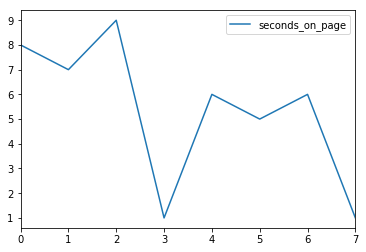

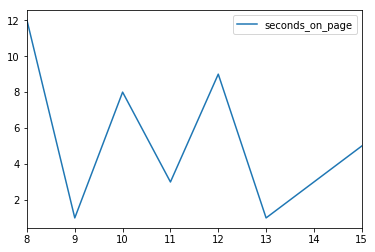

In [17]:
# and lets make a plot but grouped by participant
%matplotlib inline 
tspent.groupby("participant__code")[["seconds_on_page"]].plot();

<div class="alert alert-info lead">
    <h4>Note</h4>
    <hr>
    This only show a simple example in how to use **pandas.DataFrame** to understand more, please check 
    <br>
    <a href="https://pandas.pydata.org/pandas-docs/stable/tutorials.html">
    https://pandas.pydata.org/pandas-docs/stable/tutorials.html</a>
</div>

## Simulate with bots

Scikit-oTree offers out of the box the posibility to run the *oTree bot-based-tests* and retrieve all the data generated by them. 

The method `bot_data()` consume two arguments:

1. The name of the session to simulate
2. The number of participant 

And the return a dict like object (called `CSVStorage`) whith the same attributes as application has the session in the `app_sequence` key.

In [18]:
storage = experiment.bot_data("matching_pennies", 4)
storage

Running bots, pleae wait...
[INFO|2017-10-21 05:40:16,961] skotree > Running bots, pleae wait...


<CSVStore({matching_pennies})>

as you can see the only available app (as we see before) is the `matching_pennies`.

Lets extract the data

In [19]:
storage["matching_pennies"]

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,player.payoff,group.id_in_subsession,subsession.round_number,session.code,session.label,session.experimenter_name,session.mturk_HITId,session.mturk_HITGroupId,session.comment,session.is_demo
0,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
1,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,100,1,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
2,3,vix1j53b,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
3,4,dxyl0zhb,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,100,2,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
4,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
5,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
6,3,vix1j53b,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
7,4,dxyl0zhb,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
8,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,76oos13r,NaN,NaN,NaN,NaN,NaN,0
9,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,76oos13r,NaN,NaN,NaN,NaN,NaN,0


also for convenience the sintax `storage.matching_pennied` are available

In [20]:
storage.matching_pennies

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,player.payoff,group.id_in_subsession,subsession.round_number,session.code,session.label,session.experimenter_name,session.mturk_HITId,session.mturk_HITGroupId,session.comment,session.is_demo
0,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
1,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,100,1,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
2,3,vix1j53b,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
3,4,dxyl0zhb,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,100,2,1,76oos13r,NaN,NaN,NaN,NaN,NaN,0
4,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
5,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
6,3,vix1j53b,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
7,4,dxyl0zhb,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,2,2,76oos13r,NaN,NaN,NaN,NaN,NaN,0
8,1,sf3ducan,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,76oos13r,NaN,NaN,NaN,NaN,NaN,0
9,2,5a3f8y8c,NaN,1,12,12,matching_pennies,4,ResultsSummary,127.0.0.1,...,0,1,3,76oos13r,NaN,NaN,NaN,NaN,NaN,0


If for some reason the experiment fails, this method returns an exception. for example if we provide a invalid number of participants

In [21]:
experiment.bot_data("matching_pennies", 1)

Running bots, pleae wait...
[INFO|2017-10-21 05:40:19,044] skotree > Running bots, pleae wait...


RuntimeError: ===================== test session starts ======================
platform linux -- Python 3.5.2, pytest-2.9.2, py-1.4.31, pluggy-0.3.1
Django settings: settings (from environment variable)
rootdir: /home/juan/proyectos/skotree, inifile: 
plugins: django-3.0.0
collected 1 items

../../lib/python3.5/site-packages/otree/bots/runner.py F

=========================== FAILURES ===========================
__ test_all_bots_for_session_config[matching_pennies-1-True] ___
../../lib/python3.5/site-packages/otree/bots/runner.py:127: in test_all_bots_for_session_config
    num_participants=num_participants,
../../lib/python3.5/site-packages/otree/session.py:310: in create_session
    raise ValueError(msg)
E   ValueError: Session Config matching_pennies: Number of participants (1) does not divide evenly into group size (2)
=================== 1 failed in 0.19 seconds ===================


<div class="text-success">
    <h2>Advanced Analysis</h2>
</div>

The *pandas.DataFrame* itself is a great tool for data analysis, but also can be easily adapted to feed a lot of libraries like:

- [Scipy](https://www.scipy.org/): general scientific Computation.
- [Matplotlib](http://matplotlib.org/) or [Bokeh](https://bokeh.pydata.org) for plotting.
- [Scikit-Learn](http://scikit-learn.org/): Simple and efficient tools for data mining and data analysis
- [StatsModels]() statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. 
- [PyMC](https://pymc-devs.github.io) is a python module that implements Bayesian statistical models and fitting algorithms, including Markov chain Monte Carlo. Its flexibility and extensibility make it applicable to a large suite of problems. Along with core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.
- Deep-Learning with [TensorFlow](https://www.tensorflow.org/) or [Keras](https://keras.io/)

[And much more](https://www.scipy.org/about.html)...
